<a href="https://colab.research.google.com/github/vishalsahuu/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Book Recommendation System**

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** Vishal Sahu 
##### **Team Member 2 -** Prateek Sachdeva
##### **Team Member 3 -** Mujtaba Ali

# **Project Summary -**

1. **Mujtaba Ali**
  * EDA
  * Preprocessing & Clean-Up

2. **Prateek Sachdeva**
  * Model Implementation  

3. **Vishal Sahu**
  * Model Evaluation



--------------------------------------------------------------------------------


* First of all we were provided with three datasets namely books,users, and ratings. We studied all datasets in that the various columns were ISBN	Book-Title,	Book-Author,	Year-Of-Publication,	Publisher,	Image-URL-S(Small)	Image-URL-M(Medium), Image-URL-L(Large), User-ID, Book-Rating,Location,and	Age. ISBN is International Standard Book Number.

* Then we started with exploratory data analysis by merging all three datasets and making a new dataframe(merged_df). So we proceeded with looking for missing values and outlier detection(year, and age columns) in the given dataset. We dropped te records where negligible values were missing. For age we are interested in the age group of 5-100 years. So by considering every other value as an outliers, we converted those into null values. For age column around 26% of the values were missing. So we imputed them using random imputation.

* We also got insights(into the relationship) by visualizing the variables using histplot,coutplot,barplot, pie chart, and distplot etc. After visualizing it, we got the insights that the majority of users did not rate the books. Also majority of the books were rated 8/10. Also the majority of the readers were in the age group of 20-45. Also the majority of users were from USA and Canada. We could see an exponential increase in the publication of books after the year 1950. The Authors who wrote the maximum no. of books were Agatha christie, and William Shakespeare. The maximum books were from the publication house Harlequin and Silhouette.

* We started with the implementation of the model where  we first used the popularity based approach using the average rating. We considered only those book which were rated atleast 200 times.

* There are two techniques we have used for recommendation namely Memory based and model based(SVD). In memory based we computed similarty using KNN and cosine similarity. In singular value decomposition we factorized the original metrix in three sub metrics namely U,Sigma, and Vt(V transpose). On multiplying these three the problem of sparsity is solved.

* Finally, We evaluated our models using recall at @5 and recall @10 where we got the value to be 81%.



# **GitHub Link -**

https://github.com/vishalsahuu/Book-Recommendation-System

# **Problem Statement**

### **Business Context**
---
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


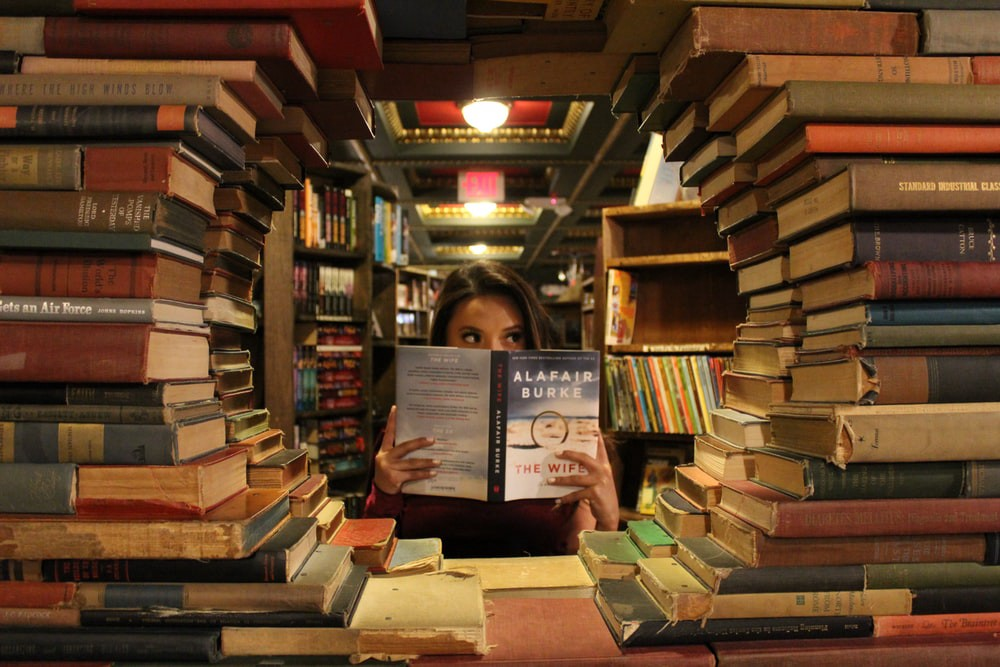

### **An Overview of Recommender Systems**
---
* A book recommender system is a tool that suggests books to users based on their interests and reading history. These systems can be used by libraries, bookstores, or online retailers to help users discover new books that they might enjoy.

* There are several approaches to building a book recommender system, including collaborative filtering, content-based filtering, and hybrid systems that combine both approaches.

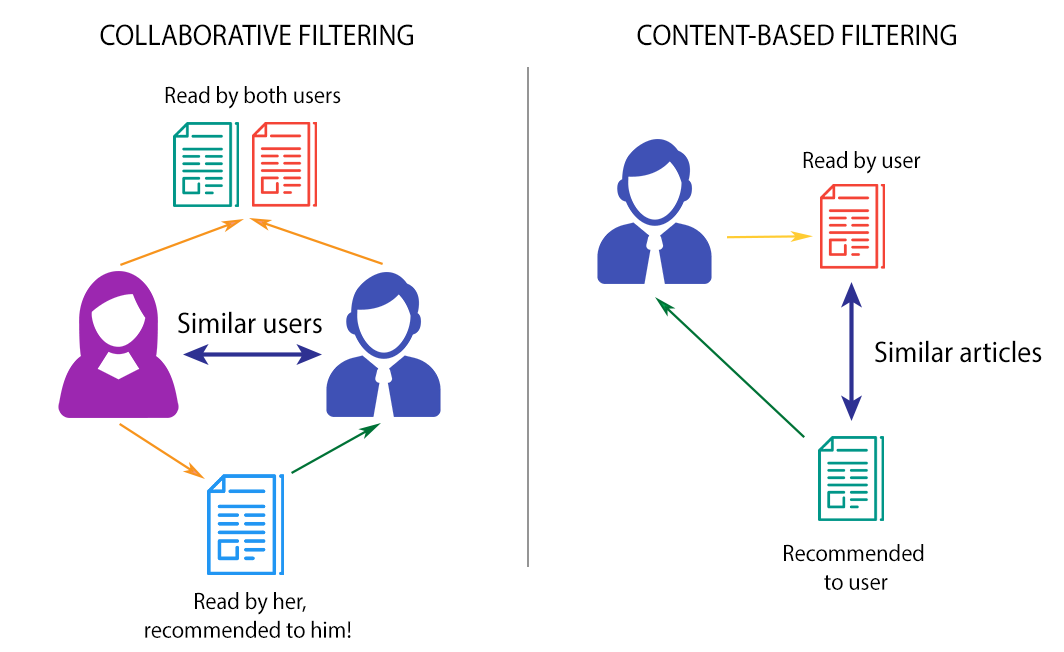

* <b>Collaborative filtering</b> is based on the idea that users who have similar reading histories are likely to have similar interests, so a book that one user likes is likely to be enjoyed by another user with a similar reading history. This approach is often used in recommendation systems for movies, music, and other products.

* <b>Content-based filtering</b>, on the other hand, focuses on the characteristics of the books themselves, such as their genre, theme, and author, to make recommendations. This approach is useful when there is not enough data available about users' preferences to use collaborative filtering.

* <b>Hybrid systems</b> combine both collaborative filtering and content-based filtering to make recommendations. They can take into account both the characteristics of the books and the preferences of the users to provide a more personalized recommendation.

* There are several challenges to building an effective book recommender system, including the need for large amounts of data to train the system, the complexity of natural language processing, and the need to balance the personalization of recommendations with the diversity of the books recommended.

### **Dataset Description**
---
The Book-Crossing dataset comprises 3 files.

* **Users:** Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

* **Books:** Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* **Ratings:** Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


# ***Let's Begin !***

# **Data Collection & Inspection**

### Importing Libraries

In [ ]:
# For data reading and manipulation
import pandas as pd
# For computationally efficient operations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100}) # For setting the figure size.
import seaborn as sns
import random # To get random sample of data

# For Model building
import scipy
import math
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
from sklearn import preprocessing

# Ignoring stopwords (words with no semantics) from English
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Loading Dataset

In [ ]:
# Reading the csv datasets
df_books=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Unsupervised ML/Books.csv')
df_ratings=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Unsupervised ML/Ratings.csv')
df_users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Unsupervised ML/Users.csv')

### Dataset First View

In [ ]:
# First look at the books dataset
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# First look at the ratings dataset
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# First look at the users dataset
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Information & Description

In [ ]:
# Basic info of the books dataframe
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# Showing the basic stats of numeric features of books dataframe
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
# Basic info of the ratings dataframe
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Showing the basic stats of numeric features of ratings dataframe
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
# Basic info of the users dataframe
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


*Age column has a lot of missing values.*

In [ ]:
# Showing the basic stats of numeric features of users dataframe
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


There is the high imbalance in age column having max age of 244 and minimum age of 0 which could be due to some error.

### Dataset Rows & Columns count

In [ ]:
# Datasets' Rows & Columns 
print(f'''\t  Books data has {df_books.shape} rows and columns.
          Ratings data has {df_ratings.shape} rows and columns.
          Users data has {df_users.shape} rows and columns.''')

	  Books data has (271360, 8) rows and columns.
          Ratings data has (1149780, 3) rows and columns.
          Users data has (278858, 3) rows and columns.


### Duplicate Values

In [ ]:
# Duplicates in datasets
print(f'''\t  Books data has {df_books.duplicated().sum()} duplicates. 
          Ratings data has {df_ratings.duplicated().sum()} duplicates.
          Users data has {df_users.duplicated().sum()} duplicates.''')

	  Books data has 0 duplicates. 
          Ratings data has 0 duplicates.
          Users data has 0 duplicates.


### Check Unique Values for each variable.

In [ ]:
# Function check unique values for each variable.
def unique_values(dataset):
  """
  function : unique_values
  description : It takes a dataset and return count of unique values of each and every column/feature.
  return type : dataframe
  """

  list_unique_valeus = [dataset[col].nunique() for col in dataset.columns]
  list_cols = dataset.columns.tolist()
  data = list(zip(list_cols,list_unique_valeus))
  df = pd.DataFrame(data,columns = ['Column','Count of Unique Values'])
  return df

In [ ]:
unique_values(df_books)

,Column,Count of Unique Values
0,ISBN,271360
1,Book-Title,242135
2,Book-Author,102023
3,Year-Of-Publication,202
4,Publisher,16807
5,Image-URL-S,271044
6,Image-URL-M,271044
7,Image-URL-L,271041


In [ ]:
unique_values(df_ratings)

,Column,Count of Unique Values
0,User-ID,105283
1,ISBN,340556
2,Book-Rating,11


In [ ]:
unique_values(df_ratings)

,Column,Count of Unique Values
0,User-ID,105283
1,ISBN,340556
2,Book-Rating,11


# **Data Pre-processing and Cleaning**

In [ ]:
# Merging the data frames
merged_df=pd.merge(df_users,df_ratings,on='User-ID') # Merging df_users with df_ratings based on User-ID
merged_df=pd.merge(merged_df,df_books,on='ISBN') # Merging merged_df with df_books based on ISBN

In [ ]:
# Showing top 5 records of merged dataframe
merged_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
# Basic information about the final datafram after merging
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [ ]:
# Rows and columns of the merged dataset
merged_df.shape

(1031136, 12)

In [ ]:
# Total duplicates present in the data
merged_df.duplicated().sum()

0

In [ ]:
# Dropping last three columns containing image URLs which will not be required for the analysis
merged_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

# Making column names handy to use
# Replacing '-' with '_' and column name in lower case
merged_df.columns= merged_df.columns.str.strip().str.lower().str.replace('-', '_')

# To display the entire content of a column
pd.set_option('display.max_colwidth', -1)

In [ ]:
# Create a country column at the place of location 
merged_df['country'] = merged_df['location'].astype(str).apply(lambda x:x.split(',')[-1])
# Drop the location column
merged_df.drop('location',axis=1,inplace=True)

In [ ]:
# Unique values in the country column
merged_df['country'].unique()

array([' usa', ' canada', ' n/a', '', ' malaysia', ' spain',
       ' new zealand', ' finland', ' united kingdom', ' portugal',
       ' brazil', ' germany', ' austria', ' italy', ' netherlands',
       ' australia', ' france', ' costa rica', ' poland', ' us', ' iran',
       ' aruba', ' india', ' pakistan', ' taiwan', ' singapore',
       ' argentina', ' romania', ' greece', ' ireland', ' philippines',
       ' belgium', ' philippines"', ' mexico', ' south africa',
       ' burkina faso', ' croatia', ' switzerland', ' denmark', ' rwanda',
       ' yugoslavia', ' turkey', ' china', ' japan', ' qatar', ' latvia',
       ' sweden', ' kuwait', ' indonesia', ' nepal', ' peru',
       ' venezuela', ' south korea"', ' hong kong', ' united states',
       ' slovakia', ' norway', ' dominican republic',
       ' bosnia and herzegovina', ' south korea', ' macedonia', ' kenya',
       ' mauritius', ' catalonia', ' nigeria', ' madagascar', ' israel',
       ' oman', ' egypt', ' lithuania', ' guate

In [ ]:
# fix the unknown and missing values
merged_df['country'] = merged_df['country'].replace('','other').replace(' n/a','other')

### Handling Missing Values

In [ ]:
# A function to get the missing values count and it's percentage
def missing_values(df):
  """
  function_name : missing_values
  Argument : dataframe
  Return : dataframe
  This function takes a data frame as an input and gives missing value count and its percentage as an output
  """
  val = df.isnull().sum()
  per = df.isnull().mean()
  missing_df = pd.concat([val,per*100],keys=['missing values','percentage of missing values'],axis=1)
  return missing_df

In [ ]:
# Check for missing values
missing_values(merged_df)

,missing values,percentage of missing values
user_id,0,0.000000
age,277835,26.944554
isbn,0,0.000000
book_rating,0,0.000000
book_title,0,0.000000
book_author,1,0.000097
year_of_publication,0,0.000000
publisher,2,0.000194
country,0,0.000000


In [ ]:
# Display the top five records of merged dataframe.
merged_df.head()

,user_id,age,isbn,book_rating,book_title,book_author,year_of_publication,publisher,country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [ ]:
# Getting the unique value from 'year_of_publication' feature
merged_df['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

*Instead of years here a couple of **mismatched values** are present.*

In [ ]:
# Rows where publisher was missing 
merged_df.loc[(merged_df['publisher'].isnull()),:]

,user_id,age,isbn,book_rating,book_title,book_author,year_of_publication,publisher,country
857163,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,usa
857174,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,usa


In [ ]:
# Replacing NaN with Unknown
merged_df['publisher'].fillna('Unknown',inplace=True)

In [ ]:
# Rows where book author was missing 
merged_df.loc[(merged_df['book_author'].isnull()),:]

,user_id,age,isbn,book_rating,book_title,book_author,year_of_publication,publisher,country
857604,98647,26.0,9627982032,8,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,malaysia


In [ ]:
# Replacing NaN with Unknown
merged_df['book_author'].fillna('Unknown',inplace=True)

In [ ]:
# Extracting the mismatched values in features 'year_of_publication', 'publisher', 'book_author', and 'book_title'
merged_df[(merged_df['year_of_publication'] == 'DK Publishing Inc') | (merged_df['year_of_publication'] == 'Gallimard')]

,user_id,age,isbn,book_rating,book_title,book_author,year_of_publication,publisher,country
906829,130571,NaN,0789466953,0,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,usa
913994,137190,31.0,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,france
946370,169663,NaN,078946697X,0,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,usa
946371,227771,19.0,078946697X,7,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,israel


In [ ]:
pd.set_option('display.max_colwidth', -1)
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
# Function to replace values of different columns
def replace_values(df,index,column1,column2,column3,column4):
  temp = df.loc[index,column1]
  df.loc[index,column1] = df.loc[index,column2]
  df.loc[index,column2] = df.loc[index,column3].split(';')[1]
  df.loc[index,column4] = temp

In [ ]:
# Fixing the mismatched values of features 'year_of_publication', 'publisher', 'book_author', and 'book_title'
replace_values(merged_df,906829,'year_of_publication','book_author','book_title','publisher')
replace_values(merged_df,913994,'year_of_publication','book_author','book_title','publisher')
replace_values(merged_df,946370,'year_of_publication','book_author','book_title','publisher')
replace_values(merged_df,946371,'year_of_publication','book_author','book_title','publisher')

In [ ]:
# Convert the data type of year of publication into integer 
merged_df['year_of_publication'] = merged_df['year_of_publication'].astype(int)

In [ ]:
# Sorting the years in ascending order from year of publication
merged_df['year_of_publication'].sort_values().unique()

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050])

*Here we can see that a lot of off values of year are present which is 0 and years after 2006*

### Handling Outliers

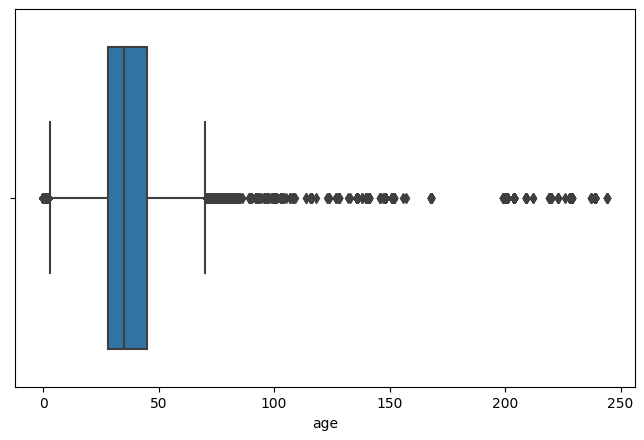

In [ ]:
# Box plot for age
sns.boxplot(merged_df['age'])

*It can be clearly seen that a lot of **outliers** are present in **age** column.*

In [ ]:
# Outlier data became NaN
merged_df.loc[(merged_df.age > 90) | (merged_df.age < 10), 'age'] = np.nan

In [ ]:
# Null values in age column
nulls = sum(merged_df['age'].isnull())
print(nulls)

285733


In [ ]:
# Imputing null values
median = merged_df['age'].median() # Median of age columns
std = merged_df['age'].std() # Standard deviation of age column

# Fill invalid and missing ages with random normal distributed numbers
random_age = np.random.randint(median - std, median + std, size = nulls)
age = merged_df['age'].copy()
age[pd.isnull(age)] = random_age
merged_df['age'] = age
merged_df['age'] = merged_df['age'].astype(int) # Convert the datatype of age into integer

In [ ]:
# Final check for missing values 
missing_values(merged_df)

,missing values,percentage of missing values
user_id,0,0.0
age,0,0.0
isbn,0,0.0
book_rating,0,0.0
book_title,0,0.0
book_author,0,0.0
year_of_publication,0,0.0
publisher,0,0.0
country,0,0.0


# **Exploratory Data Analysis**

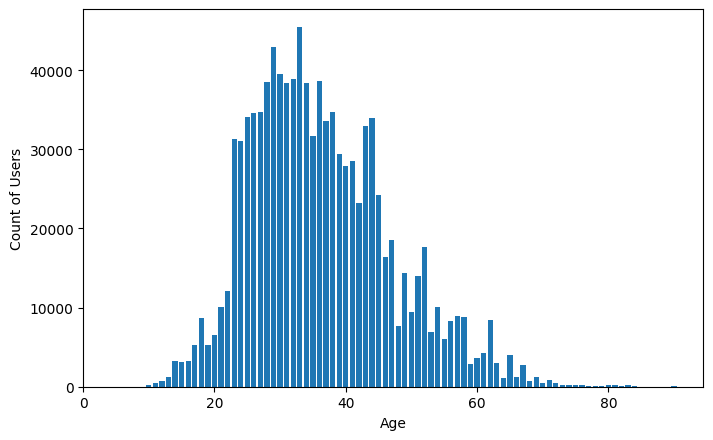

In [ ]:
# Distribution of age after removing outliers and fixing missing values
u = merged_df.age.value_counts().sort_index()
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.xlim(xmin = 0)
plt.show()

*It's observable that **maximum** number of users were of the **age** in between **20 to 45**.*

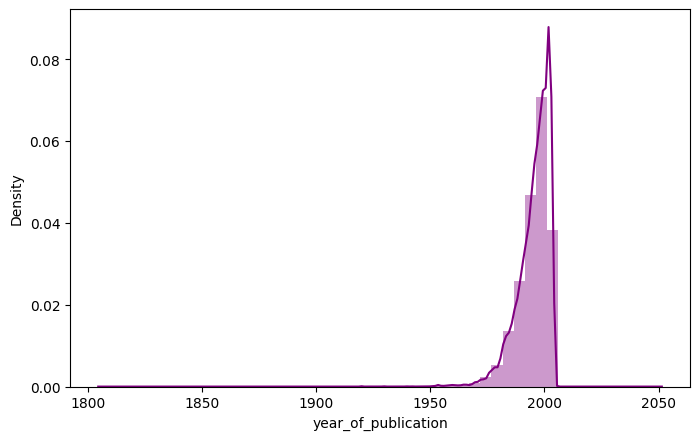

In [ ]:
# Display of the distribution of Year of Publication.
sns.distplot(merged_df[merged_df['year_of_publication']>1800]['year_of_publication'],color='purple',bins=50)

*There was an exponential increase in **book publication** after the year **1950**.*

Text(0.5, 1.0, 'Authors with Most Number of Books')

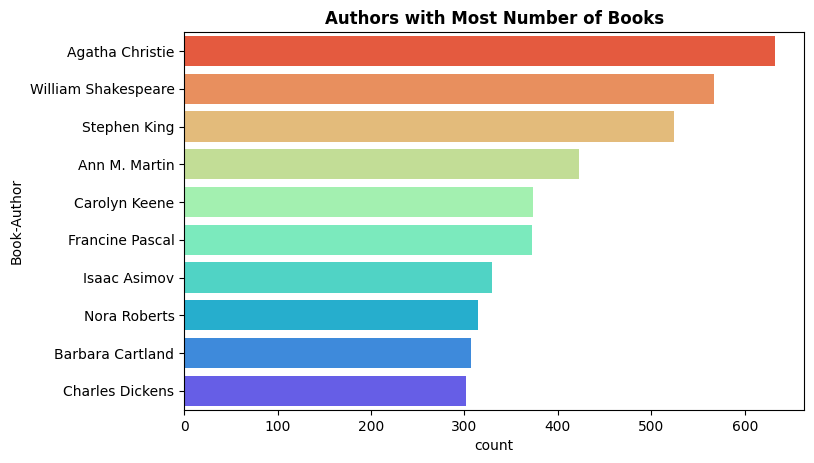

In [ ]:
# Plotting the count of top 10 books using coutplot.
sns.countplot(y='Book-Author',data=df_books,order=pd.value_counts(df_books['Book-Author']).iloc[:10].index, palette='rainbow_r')
plt.title("Authors with Most Number of Books", fontweight='bold')

*Authors with the most books were **Agatha Christie, William Shakespeare** and **Stephen King**.*

Text(0.5, 1.0, 'Top 10 Publishers')

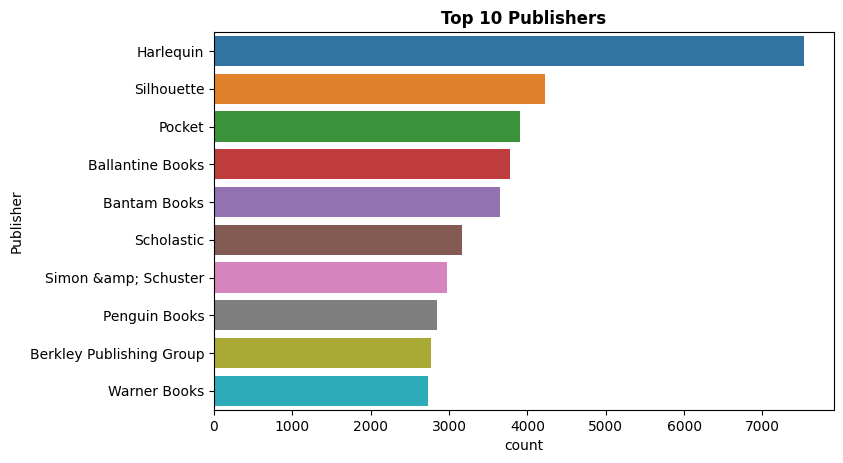

In [ ]:
# Counting the top the publisher using countplot of seaborn 
sns.countplot(y='Publisher',data=df_books,order=pd.value_counts(df_books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers', fontweight='bold')

*Publisher with **highest** number of books published was **Harlequin** followed by **Solhoutte** and **Pocket**.*

Text(0.5, 1.0, 'Top 5 countries')

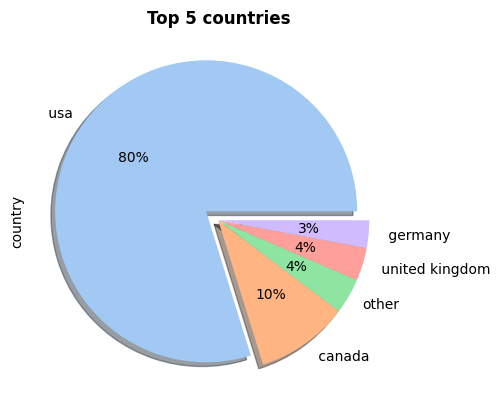

In [ ]:
# Pie chart of top five countires
palette_color = sns.color_palette('pastel')
explode = (0.1, 0, 0, 0, 0)
merged_df.country.value_counts().iloc[:5].plot(kind='pie', colors=palette_color, autopct='%.0f%%', explode=explode, shadow=True)
plt.title('Top 5 countries', fontweight='bold')

*Most of the **readers** were from **USA** followed by **Canada**.*

Text(0.5, 1.0, 'Most Famous Books')

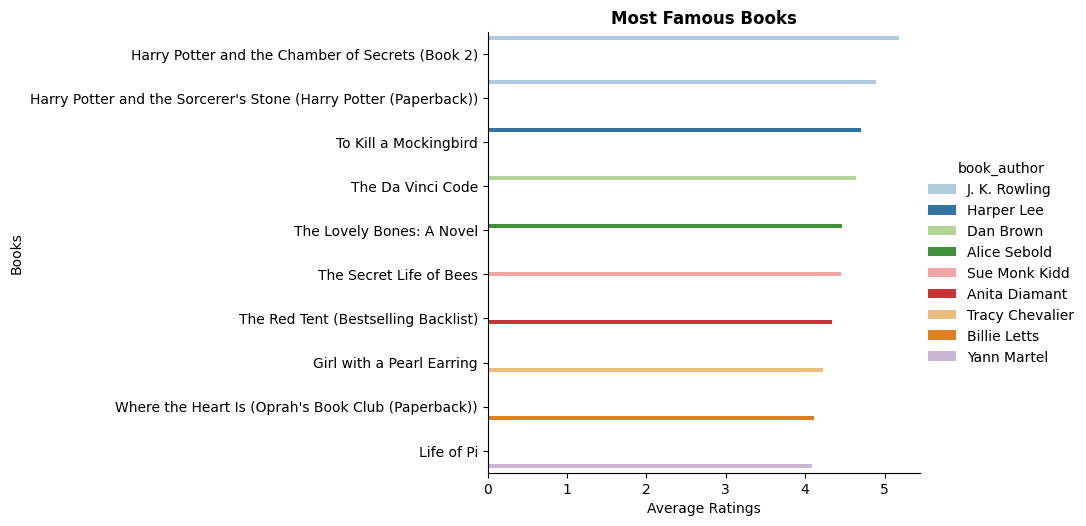

In [ ]:
#Book ratings count using group by
book_rating = merged_df.groupby(['book_title','book_author'])['book_rating'].agg(['count','mean']).sort_values(by='mean', ascending=False).reset_index()
sns.catplot(x='mean', y='book_title', data=book_rating[book_rating['count']>500][:10], kind='bar', palette = 'Paired',hue='book_author' )
plt.xlabel('Average Ratings')
plt.ylabel('Books')
plt.title('Most Famous Books', fontweight='bold')

<i> **Harry Potter** authored by **J K Rowling** had got the best average ratings followed by **To Kill a Mockingbird** and **The Da Vinci Code.** 

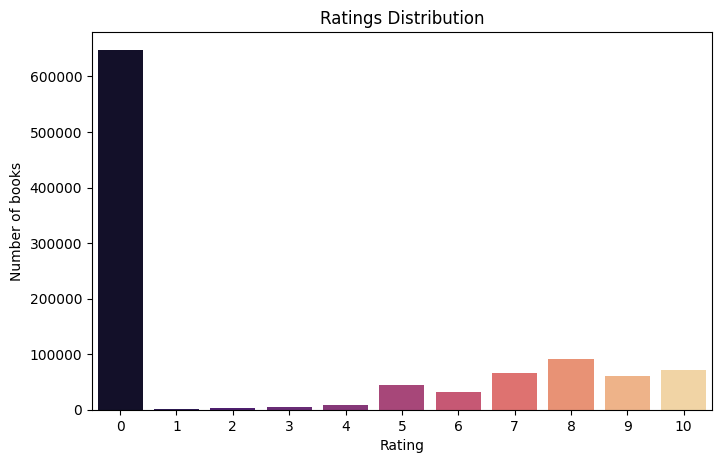

In [ ]:
# barplot of book_rating with respect to its index
sns.barplot(x = merged_df['book_rating'].value_counts().index,y = merged_df['book_rating'].value_counts().values,
            palette = 'magma').set(title="Ratings Distribution", xlabel = "Rating",ylabel = 'Number of books')
plt.show()

*More than **6 Lakh** ratings were **0**, may be becasue it had been collected implicitly.*

Text(0.5, 1.0, 'Explicit Ratings')

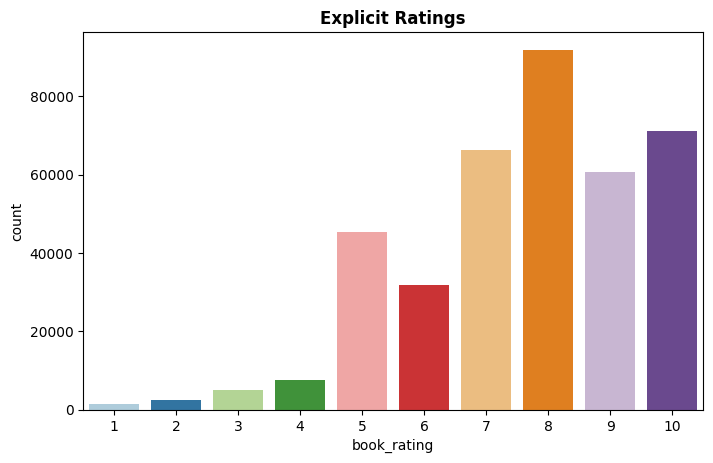

In [ ]:
# Create a dataframe of explicit ratings
explicit_ratings_df = merged_df[merged_df['book_rating']!=0]

# Count plot of Explicit Ratings
sns.countplot(x="book_rating", palette = 'Paired', data=explicit_ratings_df)
plt.title("Explicit Ratings", fontweight='bold')

Countplot of explicit ratings indicates that **higher ratings** are more common amongst users and rating **8** has been rated highest number of times.

# **Recommender Systems**

## **Popularity Based Recommender System**

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

Average ratings and number of ratings on a particular book which must be more than 200 have been used as a contraint to recommend popular books.

In [ ]:
# Create column average ratings using groupby on book title because some of the books have same book title but different isbn number
merged_df['avg_ratings'] = merged_df.groupby('book_title')['book_rating'].transform('mean')

# Create column number of ratings
merged_df['no_of_ratings'] = merged_df.groupby('book_title')['book_rating'].transform('count')

# Create new data frame popular_df
popular_df = merged_df[['book_title','avg_ratings','no_of_ratings']]

In [ ]:
# Drop duplicate books
popular_df.drop_duplicates('book_title',inplace=True)

In [ ]:
popular_df.head()

,book_title,avg_ratings,no_of_ratings
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
15,Decision in Normandy,5.000000,3
18,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,4.272727,11
29,The Mummies of Urumchi,0.000000,1


In [ ]:
# Applying a constraint of number of ratings greater tha 200 to only keep the most popular books 
popular_df = popular_df[popular_df['no_of_ratings']>200].sort_values('avg_ratings',ascending=False)

In [ ]:
# Top 50 recommended books
popular_df.head(20)

,book_title,avg_ratings,no_of_ratings
32601,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
33024,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
37538,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
33218,Harry Potter and the Order of the Phoenix (Book 5),5.501441,347
72126,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
32080,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
167539,The Hobbit : The Enchanting Prelude to The Lord of the Rings,5.007117,281
37807,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",4.948370,368
125266,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),4.895652,575
37870,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260


## **Collaborative Filtering**

### **Memory Based**
Memory-based techniques rely heavily on simple similarity measures (Cosine similarity, Pearson correlation, Jaccard coefficient… etc) to match similar people or items together. If we have a huge matrix with users on one dimension and items on the other, with the cells containing votes or likes, then memory-based techniques use similarity measures on two vectors (rows or columns) of such a matrix to generate a number representing similarity.

* Every user's rating at facevalue can't be considered because if the user is a **novice reader** with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.
* Therefore as a general rule of thumb let's consider only those Users who have rated atleast **200** books and only those books which have got atleast **50** ratings.

In [ ]:
# Applying constraint on user id using it's count 
x = merged_df.groupby('user_id').count()['book_rating'] > 200
filtered_df = merged_df[merged_df['user_id'].isin(x[x].index)]

In [ ]:
# Applying constraint on number of rartings
y = merged_df.groupby('book_title').count()['book_rating'] > 50
filtered_df = filtered_df[filtered_df['book_title'].isin(y[y].index)]

In [ ]:
# A quick look at the filtered dataframe
filtered_df

,user_id,age,isbn,book_rating,book_title,book_author,year_of_publication,publisher,country,avg_ratings,no_of_ratings
31,11676,44,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,other,2.996785,311
33,36836,56,0399135782,0,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
34,46398,37,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
38,113270,25,0399135782,0,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
39,113519,27,0399135782,0,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,usa,2.996785,311
...,...,...,...,...,...,...,...,...,...,...,...
1029284,275970,46,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,usa,3.752735,457
1029855,277639,48,0590313088,0,Hideaway,Beverly H. Renner,1980,Scholastic,usa,2.383234,167
1029857,277639,48,0671046349,0,Until You,Judith McNaught,1999,Simon &amp; Schuster Audio,usa,2.298507,67
1029862,277639,48,0671868810,0,FROM POTTER'S FIELD,Patricia Cornwell,1995,Simon &amp; Schuster Audio,usa,3.346667,75


#### **Using Cosine Similarity**

Well, here we are, using the Cosine Similarity (the dot product for normalized vectors) to build a Book Recommender System!

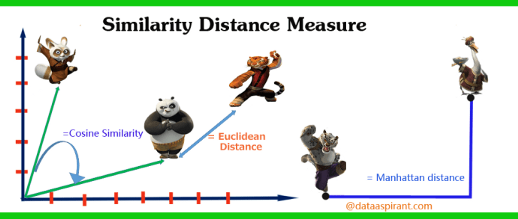

In [ ]:
# Form a user item matrix with values as ratings
pt = filtered_df.pivot_table(index='book_title',columns='user_id',values='book_rating').fillna(0)

In [ ]:
# Pivot table records
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create an object of cosine similarity
similarity_scores = cosine_similarity(pt)

In [ ]:
# Matrix size 
similarity_scores.shape

(2381, 2381)

In [ ]:
def recommend_book(book_name):
  
  """
  Description: It takes a book name and return data frame with similarity score 
  Function: recommend_book
  Argument: book_name
  Return type : dataframe
  """

  index = np.where(pt.index == book_name)[0][0]
  similar_books = sorted(list(enumerate(similarity_scores[index])), key = lambda x:x[1], reverse = True)[1:6]
  
  # print(similar_books)
  print('\n'+'-'*25+ 'Recommended Books' +'-'*25+'\n')
  for i in similar_books:
    print(pt.index[i[0]]) 
  print("\n...................................................................\n")  
  return find_similarity_score(similar_books,pt)  

In [ ]:
def find_similarity_score(similarity_scores,pivot_table):

  """
  Description: It takes similarity_Score and pivot table and return dataframe.
  function : find_similarity_Score
  Output : dataframe
  Argument  similarity_score and pivot table
  """

  list_book = []
  list_sim = []

  for i in similarity_scores:
    index_ = i[0]
    sim_ = i[1]
    list_sim.append(sim_)
    list_book.append(pivot_table.iloc[index_,:].name)
    
    df = pd.DataFrame(list(zip(list_book, list_sim)),
               columns =['Book', 'Similarity'])
  return df

In [ ]:
recommend_book('The Fellowship of the Ring (The Lord of the Rings, Part 1)')


-------------------------Recommended Books-------------------------

The Two Towers (The Lord of the Rings, Part 2)
The Return of the King (The Lord of the Rings, Part 3)
Harry Potter and the Prisoner of Azkaban (Book 3)
Foundation (Foundation Novels (Paperback))
Daybreak

...................................................................



,Book,Similarity
0,"The Two Towers (The Lord of the Rings, Part 2)",0.545609
1,"The Return of the King (The Lord of the Rings, Part 3)",0.373605
2,Harry Potter and the Prisoner of Azkaban (Book 3),0.279288
3,Foundation (Foundation Novels (Paperback)),0.273835
4,Daybreak,0.268345


#### **Using KNN**

KNN will calculate the “distance” between the target book and every other book in its database, then it ranks its distances and returns the top K nearest neighbor books as the most similar book recommendations.

In [ ]:
# Building a KNN model with Cosine Similarity as the target metric for calculating the distances.
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=5)
knn.fit(pt)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Building item to item recommendation model for the book readers
def recommend(movie, n_values=11):
  distances, indices = knn.kneighbors(pt.loc[movie,:].values.reshape(1, -1), n_neighbors = n_values)
  dist = distances.flatten().tolist()
  movies = []
  for i in range(1, len(indices.flatten())):
    movies.append(pt.index[indices.flatten()[i]])
  # Convert to a dataframe
  data = list(zip(movies,dist))
  df = pd.DataFrame(data,columns=['Movie','Distance'])

  return df

In [ ]:
recommend('The Fellowship of the Ring (The Lord of the Rings, Part 1)')

,Movie,Distance
0,"The Two Towers (The Lord of the Rings, Part 2)",0.000000
1,"The Return of the King (The Lord of the Rings, Part 3)",0.454391
2,Harry Potter and the Prisoner of Azkaban (Book 3),0.626395
3,Foundation (Foundation Novels (Paperback)),0.720712
4,Daybreak,0.726165
5,Harry Potter and the Goblet of Fire (Book 4),0.731655
6,FLOOD TIDE,0.742726
7,Firestarter,0.744201
8,Harry Potter and the Chamber of Secrets (Book 2),0.745450
9,The Hobbit: or There and Back Again,0.746724


### **Model Based**
Model-based techniques on the other hand try to further fill out this matrix. They tackle the task of “guessing” how much a user will like an item that they did not encounter before. For that they utilize several machine learning algorithms to train on the vector of items for a specific user, then they can build a model that can predict the user’s rating for a new item that has just been added to the system.

Popular model-based techniques are Bayesian Networks, Singular Value Decomposition, and Probabilistic Latent Semantic Analysis (or Probabilistic Latent Semantic Indexing)

Recommender systems have a problem known as user **cold-start**, in which it is hard to provide **personalized** recommendations for users with none or a very few number of consumed items, due to the **lack** of information to model their preferences. For this reason, we are keeping in the dataset only users with at least **50** interactions.

In [ ]:
users_interactions_count_df = merged_df.groupby(['book_title', 'user_id']).size().groupby('user_id').size()
print('Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 50].reset_index()[['user_id']]
print('Number of users with at least 50 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 92106
Number of users with at least 50 interactions: 3055


In [ ]:
print('Number of interactions: %d' % len(merged_df))
interactions_from_selected_users_df = merged_df.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'user_id',
               right_on = 'user_id')
print('Number of interactions from users with at least 50 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 1031136
Number of interactions from users with at least 50 interactions: 690114


In [ ]:
interactions_from_selected_users_df.head()

,user_id,age,isbn,book_rating,book_title,book_author,year_of_publication,publisher,country,avg_ratings,no_of_ratings
0,243,38,0440234743,0,The Testament,John Grisham,1999,Dell,usa,3.179903,617
1,243,31,0440225701,0,The Street Lawyer,JOHN GRISHAM,1999,Dell,usa,2.851376,545
2,243,35,042511774X,0,Breathing Lessons,Anne Tyler,1994,Berkley Publishing Group,usa,2.117155,239
3,243,27,0345465083,0,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,usa,2.732620,187
4,243,37,0060915544,10,The Bean Trees,Barbara Kingsolver,1989,Perennial,usa,4.087404,389


In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['book_title','user_id'])['book_rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 685507


,book_title,user_id,book_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",18995,0.000000
1,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",35859,0.000000
2,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",55927,0.000000
3,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",96448,3.321928
4,Always Have Popsicles,172742,0.000000


In [ ]:
# Create an object of label encoder
le = preprocessing.LabelEncoder()
le.fit(merged_df['book_title'].unique())

LabelEncoder()

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df, 
                                   test_size=0.20,
                                   stratify=interactions_full_df['user_id'],
                                   random_state=42)

print('Number of interactions on Train set: %d' % len(interactions_train_df))
print('Number of interactions on Test set: %d' % len(interactions_test_df))

Number of interactions on Train set: 548405
Number of interactions on Test set: 137102


In [ ]:
interactions_train_df['book_title'] = le.transform(interactions_train_df['book_title'])
interactions_test_df['book_title'] = le.transform(interactions_test_df['book_title'])

interactions_train_df.head()

,book_title,user_id,book_rating
324017,121055,11676,2.807355
169197,62168,27617,3.000000
381627,141702,168064,0.000000
648904,227526,183088,3.000000
503456,181756,266226,0.000000


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='user_id', 
                                                          columns='book_title', 
                                                          values='book_rating').fillna(0)

users_items_pivot_matrix_df.head()

book_title,0,1,2,3,4,5,6,7,8,9,...,241046,241048,241050,241051,241054,241055,241062,241064,241067,241070
user_id,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[243, 254, 507, 638, 643, 741, 882, 929, 1025, 1211]

#### **Singular Value Decomposition**
The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). 

In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

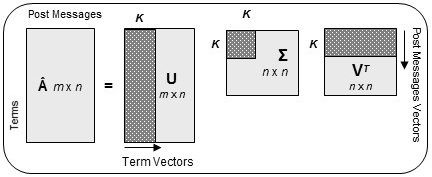

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(3055, 172349)

In [ ]:
U.shape

(3055, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 172349)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
# Applying dot product between the matrices 
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[3.97434827e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.27554204e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.67802126e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.02408189e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.10266144e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.83624797e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# Rows and columns of predicted ratings dataframe of all users 
all_user_predicted_ratings.shape

(3055, 172349)

In [ ]:
# Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,243,254,507,638,643,741,882,929,1025,1211,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
book_title,,,,,,,,,,,,,,,,,,,,,
0,0.000397,0.001276,0.000268,0.000884,0.000010,0.000007,0.000470,0.000118,0.000034,0.000146,...,0.000089,0.000203,0.000059,0.000287,-9.335770e-19,0.000005,-0.000053,0.000070,0.000710,0.000484
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000191,0.000603,0.000134,0.000341,0.000004,0.000003,0.000212,0.000065,0.000005,0.000058,...,0.000042,0.000072,0.000003,0.000095,-4.481975e-19,-0.000044,-0.000061,0.000016,0.000286,0.000245
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Number of users
len(cf_preds_df.columns)

3055

In [ ]:
class CFRecommender:

    '''
    Class_Name : CFRecommender
    Description : This class is used to recommend book using the predicted ratings of users
    '''
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['book_title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'book_title', 
                                                          right_on = 'book_title')[['recStrength', 'book_title']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, filtered_df)

#### **Evaluation**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

This evaluation method works as follows:

* For each user
    * For each item the user has interacted in test set
        * Sample 100 other items the user has never interacted.   
        * Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('user_id')
interactions_train_indexed_df = interactions_train_df.set_index('user_id')
interactions_test_indexed_df = interactions_test_df.set_index('user_id')

`The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [ ]:
def get_items_interacted(person_id, interactions_df):
    interacted_items = interactions_df.loc[person_id]['book_title']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
        all_items = set(filtered_df['book_title'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['book_title']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['book_title'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['book_title'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['book_title'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['book_title'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()  

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
3054 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.8158743125556155, 'recall@10': 0.8158743125556155}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
12,1788,1788,2113,0.846190,0.846190,11676
413,847,847,1272,0.665881,0.665881,198711
11,766,766,1148,0.667247,0.667247,98391
10,909,909,1142,0.795972,0.795972,153662
194,918,918,1107,0.829268,0.829268,35859
36,565,565,847,0.667060,0.667060,212898
13,547,547,794,0.688917,0.688917,278418
329,597,597,654,0.912844,0.912844,76352
18,432,432,589,0.733447,0.733447,110973
377,460,460,581,0.791738,0.791738,235105


In [ ]:
rec = cf_recommender_model.recommend_items(6242)
rec = le.inverse_transform(rec['book_title']).tolist()
rec

['The Lovely Bones: A Novel',
 "Bridget Jones's Diary",
 'The Red Tent (Bestselling Backlist)',
 'To Kill a Mockingbird',
 'The Secret Life of Bees',
 "The Girls' Guide to Hunting and Fishing",
 'Angels &amp; Demons',
 'House of Sand and Fog',
 'The Bean Trees',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel']

In [ ]:
merged_df[merged_df['user_id']==6242].head()

,user_id,age,isbn,book_rating,book_title,book_author,year_of_publication,publisher,country,avg_ratings,no_of_ratings
525,6242,30,0452264464,5,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,canada,3.411111,180
17490,6242,34,0375705856,5,Plainsong (Vintage Contemporaries),KENT HARUF,2000,Vintage,canada,3.301282,156
24940,6242,42,0060987103,7,Wicked: The Life and Times of the Wicked Witch of the West,Gregory Maguire,1996,Regan Books,canada,3.766871,326
25919,6242,30,006000438X,6,The Death of Vishnu: A Novel,Manil Suri,2002,Perennial,canada,4.000000,81
31416,6242,25,038542017X,7,"Like Water for Chocolate : A Novel in Monthly Installments with Recipes, Romances, and Home Remedies",LAURA ESQUIVEL,1995,Anchor,canada,3.719008,121


## **Content Based Filtering**

Content-based recommendation systems are a type of recommender system that utilizes the characteristics of the items being recommended to make recommendations to users. These systems recommend items to users based on their past behavior, preferences, and characteristics, as well as the attributes of the items themselves.

Limiting the dataset due to lack of RAM capacity to a threshold of number of ratings more than 200.

In [ ]:
filtered_df_updated = filtered_df[filtered_df['no_of_ratings']>200].reset_index()

In [ ]:
#Trains a model whose vectors, composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df=1,
                     stop_words='english')

item_ids = filtered_df_updated['book_title'].tolist()
tfidf_matrix = vectorizer.fit_transform(filtered_df_updated['book_title'] + "" + filtered_df_updated['book_author'])
tfidf_feature_names = vectorizer.get_feature_names()
tfidf_matrix.shape

(32645, 1845)

In [ ]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(32645, 32645)

In [ ]:
def book_recommender(book_name):
  print("Recommended Books:\n")
  isbn = filtered_df_updated.loc[filtered_df_updated['book_title'] == book_name].reset_index(drop = True).iloc[0]['isbn']
  content = []

  idx = filtered_df_updated.index[filtered_df_updated['isbn'] == isbn].tolist()[0]
  similar_indices = cosine_similarities[idx].argsort()[::-1]
  similar_items = []
  for i in similar_indices:
      if filtered_df_updated['book_title'][i] != book_name and filtered_df_updated['book_title'][i] not in similar_items and len(similar_items) < 5:
          similar_items.append(filtered_df_updated['book_title'][i])
          content.append(filtered_df_updated['book_title'][i])

  for book in similar_items:
      print(book)

In [ ]:
book_recommender("Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))")

Recommended Books:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)


# **Conclusions**

* The majority of the **rarings** were **implicit** and most of the books were rated <b>8/10</b>.

*  We saw an **exponential** increase in the publication of books after the year <b>1950</b>.

* Majority of the readers were in the age group of <b>20-45</b>.

* Readers were mostly from **USA** followed by **Canada.**

* **Agatha christie, and William Shakespeare** wrote the **maximum** number of books.

* The **maximum** number of books were from the publication house <b>Harlequin and Silhouette</b>.

* <b>Harry Potter authored by J K Rowling</b> had got the **best average ratings** followed by To Kill a Mockingbird and The Da Vinci Code.

* Finally, we **evaluated** our models using **recall@5** and **recall@10** where we got the recall <b>81%</b>.